In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path to the 'Resources' directory one level up
file_path = '../Resources/medianAskingRent_All.csv'




In [2]:
# Import csv from easystreet with pricing by borough
df = pd.read_csv(file_path)


In [3]:
# Drop the borough entered as NaN
df = df.dropna(subset=['Borough'])

# Define the list of columns to include (starting from the 4th column)
columns_to_include = df.columns[3:]

# Convert all columns except 'Borough' to numeric, coerce errors to NaN
for col in columns_to_include:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#print the csv top 10 rows
print(df.head(10))

              areaName    Borough      areaType  2010-01  2010-02  2010-03  \
0         All Downtown  Manhattan     submarket   3200.0   3200.0   3020.0   
1          All Midtown  Manhattan     submarket   2875.0   2800.0   2800.0   
2  All Upper East Side  Manhattan     submarket   2450.0   2450.0   2400.0   
3  All Upper Manhattan  Manhattan     submarket   1825.0   1800.0   1795.0   
4  All Upper West Side  Manhattan     submarket   2895.0   2800.0   2750.0   
5              Astoria     Queens  neighborhood   1600.0   1650.0   1620.0   
6           Auburndale     Queens  neighborhood      NaN      NaN      NaN   
7           Bath Beach   Brooklyn  neighborhood      NaN      NaN      NaN   
8    Battery Park City  Manhattan  neighborhood   3495.0   3346.0   3268.0   
9            Bay Ridge   Brooklyn  neighborhood   1350.0   1375.0   1350.0   

   2010-04  2010-05  2010-06  2010-07  ...  2022-12  2023-01  2023-02  \
0   3100.0   3100.0   3200.0   3195.0  ...   4800.0   4844.0   4951.

In [4]:
# Create a list of all unique boroughs from the "Borough" column
unique_boroughs = df['Borough'].unique()

# Initialize an empty DataFrame to store the results
result_data = []


In [5]:
# Iterate through each borough
for borough in unique_boroughs:
    # Select only rows for the current borough
    borough_df = df[df['Borough'] == borough]

    # For each year, calculate the median of the 12 months
    borough_yearly_data = {'Borough': borough}
    for year in range(2010, 2024):  # Assuming the data spans from 2010 to 2023
        # Create a list of columns for the current year
        year_columns = [col for col in columns_to_include if str(year) in col]
        # Calculate the median rental price for the current year, excluding NaN values
        median_yearly_rent = borough_df[year_columns].median(axis=1, skipna=True).median(skipna=True)
        # Add the result to the borough's yearly data
        borough_yearly_data[str(year)] = median_yearly_rent

    # Append the data to the result list
    result_data.append(borough_yearly_data)


In [6]:
# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

# Format the median prices with dollar sign and two decimal places, skipping 'Borough' column
for col in result_df.columns[1:]:
    result_df[col] = result_df[col].apply(lambda x: "${:.2f}".format(x))


In [7]:
# Reset the index of the result DataFrame
result_df.reset_index(drop=True, inplace=True)

In [8]:
# Save the DataFrame as a CSV file in the "Data File Repository" directory one level up
output_folder = '../Data File Repository'
output_file_path = os.path.join(output_folder, 'Yearly_Median_Rent_DF.csv')
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
result_df.to_csv(output_file_path, index=False)



In [9]:
# Print the new dataframe
print(result_df)


         Borough      2010      2011      2012      2013      2014      2015  \
0      Manhattan  $2847.50  $3157.00  $3275.00  $3282.50  $3270.00  $3394.00   
1         Queens  $1538.25  $1550.00  $1825.00  $1743.75  $1799.00  $1850.00   
2       Brooklyn  $2033.50  $1743.75  $1900.00  $2106.25  $2225.00  $2300.00   
3          Bronx  $1425.00  $1210.75  $1425.00  $1275.00  $1331.50  $1400.00   
4  Staten Island      $nan      $nan  $1400.00  $1487.50  $1675.00  $1662.50   

       2016      2017      2018      2019      2020      2021      2022  \
0  $3412.50  $3318.00  $3334.50  $3500.00  $3172.50  $3267.50  $4213.00   
1  $1937.50  $1993.00  $2000.00  $2010.75  $2025.00  $2004.25  $2300.00   
2  $2300.00  $2335.00  $2400.00  $2450.00  $2475.00  $2256.00  $2847.50   
3  $1552.00  $1695.00  $1800.00  $1829.00  $1850.00  $1851.00  $1985.00   
4  $1990.00  $1921.50  $1865.00  $2022.50  $1925.00  $1975.00  $2050.00   

       2023  
0  $4471.50  
1  $2500.00  
2  $3125.00  
3  $2191.00 

In [10]:
result_df

,Borough,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Manhattan,$2847.50,$3157.00,$3275.00,$3282.50,$3270.00,$3394.00,$3412.50,$3318.00,$3334.50,$3500.00,$3172.50,$3267.50,$4213.00,$4471.50
1,Queens,$1538.25,$1550.00,$1825.00,$1743.75,$1799.00,$1850.00,$1937.50,$1993.00,$2000.00,$2010.75,$2025.00,$2004.25,$2300.00,$2500.00
2,Brooklyn,$2033.50,$1743.75,$1900.00,$2106.25,$2225.00,$2300.00,$2300.00,$2335.00,$2400.00,$2450.00,$2475.00,$2256.00,$2847.50,$3125.00
3,Bronx,$1425.00,$1210.75,$1425.00,$1275.00,$1331.50,$1400.00,$1552.00,$1695.00,$1800.00,$1829.00,$1850.00,$1851.00,$1985.00,$2191.00
4,Staten Island,$nan,$nan,$1400.00,$1487.50,$1675.00,$1662.50,$1990.00,$1921.50,$1865.00,$2022.50,$1925.00,$1975.00,$2050.00,$2095.00


In [11]:
#Create x and y axis lists
time = np.arange(2010, 2024, 1)
manhattan = [2847.50,3157.00,3275.00,3282.50,3270.00,3394.00,3412.50,3318.00,3334.50,3500.00,3172.50,3267.50,4213.00,4471.50]
queens = [1538.25,1550.00,1825.00,1743.75,1799.00,1850.00,1937.50,1993.00,2000.00,2010.75,2025.00,2004.25,2300.00,2500.00]
brooklyn = [2033.50,1743.75,1900.00,2106.25,2225.00,2300.00,2300.00,2335.00,2400.00,2450.00,2475.00,2256.00,2847.50,3125.00]
bronx = [1425.00,1210.75,1425.00,1275.00,1331.50,1400.00,1552.00,1695.00,1800.00,1829.00,1850.00,1851.00,1985.00,2191.00]
staten_island = [0,0,1400.00,1487.50,1675.00,1662.50,1990.00,1921.50,1865.00,2022.50,1925.00,1975.00,2050.00,2095.00]


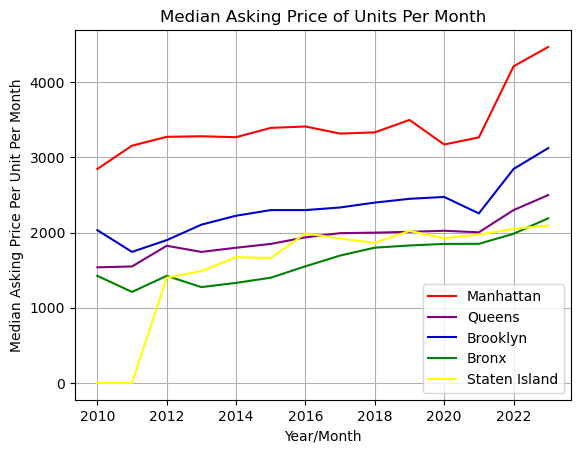

In [12]:
#Plot the chart, add styling
manhattan_median = plt.plot(time, manhattan, color="red", label="Manhattan")
queens_median = plt.plot(time, queens, color="purple", label="Queens")
brooklyn_median = plt.plot(time, brooklyn, color="mediumblue", label="Brooklyn")
bronx_median = plt.plot(time, bronx, color="green", label="Bronx")
staten_island_median = plt.plot(time, staten_island, color="yellow", label="Staten Island")

#Labels to axes
plt.title("Median Asking Price of Units Per Month")
plt.xlabel("Year/Month")
plt.ylabel("Median Asking Price Per Unit Per Month")
plt.grid()

#Create Legend for chart
plt.legend()
plt.show()
